<a href="https://colab.research.google.com/github/febigandap/TugasIndividu_TrainDataset/blob/master/EDA_trainDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**PERTANYAAN YANG AKAN DI JAWAB PADA PROSES INI ADALAH :**

Menghitung jumlah penumpang kereta pada masing-masing “class” dengan parameter “gender”, dan “satisfaction” penumpang. 

**1. INSTALASI SPARK PADA GOOGLE COLAB**

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

**2. IMPORT LIBRARY SPARK YANG SUDAH DIINSTALL**

In [3]:
import findspark
findspark.init("spark-3.0.0-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

In [4]:
!pip install -q pyspark_dist_explore

In [5]:
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist

**3. INISIALISASI SPARK CONTEXT DAN SPARK SESSION**

In [6]:
sc = spark.sparkContext
spark = SparkSession(sc)

**4. LOAD DATASET**

In [8]:
train_df = spark.read.csv("Train.csv", header=True, inferSchema=True)
train_df.printSchema()            #mengecek schema dari dataset

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Customer Type: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Type of Travel: string (nullable = true)
 |-- Class: string (nullable = true)
 |-- Flight Distance: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanline

**5. PROSES EDA**

In [9]:
print("Jumlah total penumpang:")
train_df.count()

Jumlah total penumpang:


103904

In [10]:
print("Jumlah penumpang pada masing-masing Class Kereta : ")
train_df.groupby("class").count().show()

+--------+-----+
|   class|count|
+--------+-----+
|Eco Plus| 7494|
|Business|49665|
|     Eco|46745|
+--------+-----+



In [11]:
print("Jumlah penumpang pada masing-masing gender : ")
train_df.groupby("gender").count().show()

Jumlah penumpang pada masing-masing gender : 
+------+-----+
|gender|count|
+------+-----+
|Female|52727|
|  Male|51177|
+------+-----+



In [12]:
print("Jumlah satisfaction penumpang : ")
train_df.groupby("satisfaction").count().show()

Jumlah satisfaction penumpang : 
+--------------------+-----+
|        satisfaction|count|
+--------------------+-----+
|neutral or dissat...|58879|
|           satisfied|45025|
+--------------------+-----+



In [13]:
train_df.select('class').describe().show()

+-------+--------+
|summary|   class|
+-------+--------+
|  count|  103904|
|   mean|    null|
| stddev|    null|
|    min|Business|
|    max|Eco Plus|
+-------+--------+



In [14]:
train_df.select('gender').describe().show()

+-------+------+
|summary|gender|
+-------+------+
|  count|103904|
|   mean|  null|
| stddev|  null|
|    min|Female|
|    max|  Male|
+-------+------+



In [15]:
train_df.select('satisfaction').describe().show()

+-------+--------------------+
|summary|        satisfaction|
+-------+--------------------+
|  count|              103904|
|   mean|                null|
| stddev|                null|
|    min|neutral or dissat...|
|    max|           satisfied|
+-------+--------------------+



data age tidak digunakan pada proses inti, hanya pengujian histogram.

In [17]:
train_df.select('Age').describe().show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|            103904|
|   mean|39.379706267323684|
| stddev|15.114963699737805|
|    min|                 7|
|    max|                85|
+-------+------------------+



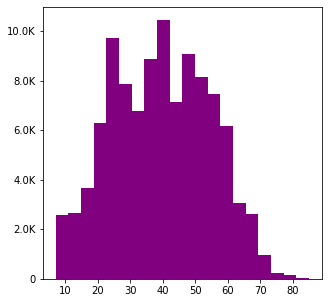

In [16]:
train_df_age = train_df.select('Age')
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, train_df_age, bins=20, color="purple")
plt.show()

**6. PRE - PROCESSING DATA**

Pada proses yang akan saya lakukan kita hanya menghitung jumlah data penumpang berdasarkan parameter "gender", "satisfaction" untuk tiap "class" pada kereta tersebut sehingga untuk pengolahan data null,outlier, data string tidak dapat dproses dengan baik, oleh karena itu saya akan mencontohkan pada kolom "Age" dengan tipe Integer agar dapat menampilkan histogram dan melihat apakah data masih berisi "Null" atau tidak.

In [18]:
mean_age = train_df.agg(avg(col("age"))).first()
print("rata-rata class", mean_age[0])
train_df = train_df.na.fill(mean_age[0], ["age"])

rata-rata class 39.379706267323684


In [19]:
print("Jumlah total penumpang dengan kolom Age kosong(null):")
train_df.where(col("Age").isNull()).count()

Jumlah total penumpang dengan kolom Age kosong(null):


0

In [20]:
train_df.coalesce(1).write.csv("train2_processed", header=True)

In [21]:
spark.stop()    #digunakan untuk menghentikan SparkSession